In [1]:
import os
import pandas as pd
import glob
import sys
import matplotlib.pyplot as plt

sys.path.append("..")

In [2]:
from src.data_generation.datasets.generator_noise_fourier import (
    generate_fourier_noise_dataset,
)
from src.data_generation.datasets.generator_noise_average import (
    generate_average_noise_dataset,
)

In [3]:
path_repo = os.path.dirname(os.getcwd())
path = os.path.join(path_repo, "data", "fourier_noise", "freq")
path_raw = os.path.join(path_repo, "data", "raw", "steel", "1channel")
num_noise_images = 5000

In [4]:
generate_fourier_noise_dataset(
    path=path,
    raw_epsilons_path=path_raw,
    num_images=num_noise_images,
    pass_value=4,
    domain="frequency",
)

100%|██████████| 5000/5000 [03:24<00:00, 24.45it/s]


In [16]:
path = os.path.join(path_repo, "data", "average_noise")

generate_average_noise_dataset(
    path_to_raw=path_raw, path=path, num_images=1000, num_used_raw_images=50
)

100%|██████████| 1000/1000 [03:38<00:00,  4.58it/s]


## Check the phase distribution in the generated images ##

In [10]:
# list all the images
images = glob.glob(path + "/*.png")

In [12]:
# generate a list with filenames of raw images (last 9 characters of the filename)
raw_images = [os.path.basename(img)[-9:] for img in images]

In [13]:
# Create a dataframe with the filenames of noise images and epsilons of the raw images
eps_est = pd.read_csv(os.path.join(path_raw, "raw_epsilons.csv"))

df = pd.DataFrame(data={"filename": images, "raw_image": raw_images})

In [19]:
# Merging dataframes
merged_df = pd.merge(eps_est, df, left_on="filename", right_on="raw_image")

# Rearranging columns
merged_df = merged_df[["filename_y", "raw_image", "epsilon"]]
merged_df.columns = ["filename", "raw_image", "epsilon"]

In [21]:
merged_df.to_csv(
    os.path.join(path_repo, "data", "fourier_noise", "freq", "epsilons.csv"),
    index=False,
)

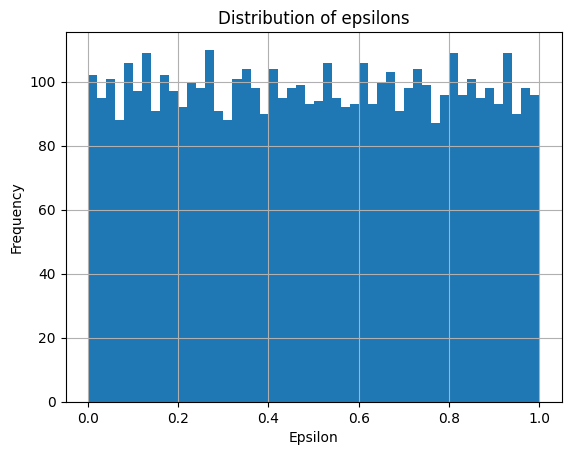

In [14]:
eps_est = pd.read_csv(os.path.join(path_raw, "raw_epsilons.csv"))

# filter the epsilons that are in the list of raw images
eps_est = eps_est[eps_est["filename"].isin(raw_images)]
# create a bar plot with the distribution of epsilons
eps_est["epsilon"].hist(bins=50)
plt.title("Distribution of epsilons")
plt.xlabel("Epsilon")
plt.ylabel("Frequency")
plt.show()

Epsilon check okay 

In [5]:
path_average_noise = os.path.join(path_repo, "data", "average_noise")
path_fourier_noise_freq = os.path.join(path_repo, "data", "fourier_noise", "freq")

params = {
    # params for blackbox
    "width": (30, 150),
    "height": (30, 100),
    "x": (0, 640),
    "y": (0, 480),
    # params for pizza
    "nr_of_pizzas": (10, 20),
    "center_point": (320, 240),
    "channels": 1,
    "strength": (10, 20),
    # params for average
    "path_average_noise": path_average_noise,
    # params for fourier
    "path_fourier_noise_freq": path_fourier_noise_freq,
    "domain": "frequency",
    "pass_value": 4,
    # params for bubble
    "spray_particles": 800,
    "spray_diameter": 8,
    "fringes_color": None,
    "range_of_blobs": (30, 40),
}

In [9]:
from src.data_generation.datasets.generator import generate_dataset

params["noise_proportion"] = 0.8
path_generated_fourier_freq = os.path.join(path_repo, "data", "balanced_fourier")
generate_dataset(
    noise_type=["fourier", "average"],
    path=path_generated_fourier_freq,
    name_prefix="freq_avg_prop_08",
    n_copies=10,
    epsilon_range=(0.0, 1.0),
    epsilon_step=0.001,
    zipfile=False,
    parameters_filename="freq_avg_prop_08.csv",
    **params,
)

100%|██████████| 1000/1000 [06:23<00:00,  2.61it/s]
